### Introduction: 

This notebook demonstrates use of feedforward neural network for a regression problem. We'll be using synthetic data for the purpose. Using synthetic data helps us understand better in understanding properly where our machine learning algorithms succeed and where it fails. 

### Code:

In [1]:
import tensorflow as tf
print(tf.__version__)

C:\Users\Dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2.0.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Make the dataset

N = 1000
X = np.random.random((N,2))*6-3        #uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:, 1])

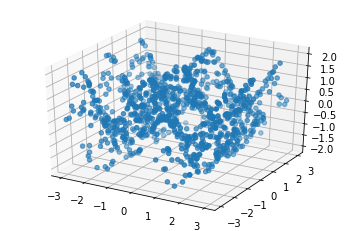

In [4]:
#Plot the dataset

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

In [5]:
#Build the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

In [6]:
#Compile and Fit

opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)


Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.9318
Epoch 2/100
1000/1000 [==============================] - 0s 81us/sample - loss: 0.8895
Epoch 3/100
1000/1000 [==============================] - 0s 80us/sample - loss: 0.9018
Epoch 4/100
1000/1000 [==============================] - 0s 85us/sample - loss: 0.8512
Epoch 5/100
1000/1000 [==============================] - 0s 82us/sample - loss: 0.8422
Epoch 6/100
1000/1000 [==============================] - 0s 95us/sample - loss: 0.7933
Epoch 7/100
1000/1000 [==============================] - 0s 85us/sample - loss: 0.7363
Epoch 8/100
1000/1000 [==============================] - 0s 71us/sample - loss: 0.7065
Epoch 9/100
1000/1000 [==============================] - 0s 82us/sample - loss: 0.6487
Epoch 10/100
1000/1000 [==============================] - 0s 84us/sample - loss: 0.6178
Epoch 11/100
1000/1000 [==============================] - 0s 71us/sample - loss: 0.6028
Epoch 12/100
1000/10

1000/1000 [==============================] - 0s 75us/sample - loss: 0.0087
Epoch 94/100
1000/1000 [==============================] - 0s 67us/sample - loss: 0.0135
Epoch 95/100
1000/1000 [==============================] - 0s 68us/sample - loss: 0.0182
Epoch 96/100
1000/1000 [==============================] - 0s 63us/sample - loss: 0.0243
Epoch 97/100
1000/1000 [==============================] - 0s 65us/sample - loss: 0.0619
Epoch 98/100
1000/1000 [==============================] - 0s 69us/sample - loss: 0.0444
Epoch 99/100
1000/1000 [==============================] - 0s 69us/sample - loss: 0.0221
Epoch 100/100
1000/1000 [==============================] - 0s 68us/sample - loss: 0.0108


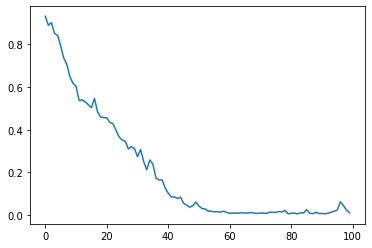

In [7]:
#Plot the loss
plt.plot(r.history['loss'], label='loss')

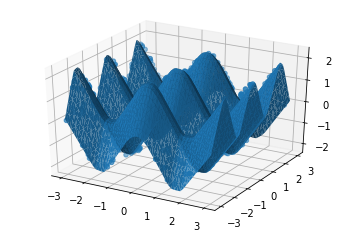

In [8]:
# Plot the prediction surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)


#surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()


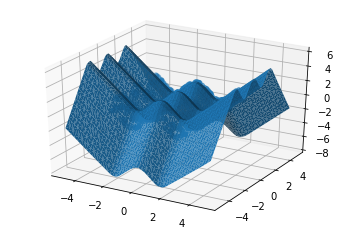

In [9]:
# Can it extrapolate?
# Plot the prediction surface

fig = plt.figure()
ax= fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

#surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

We know that cosine function is going to repeat from -inf to +inf. So we wonder if the neural network can figure that out. We see that it doesnt work. It assumes that pattern keeps going in the direction it was going. It is because the neural network doesn't use periodic activation function so we can't expect it to be periodic with respect to the inputs. 